## Multiple Linear Regression - Bike Sharing Assignment

## Problem statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

# Business Goal:
We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Step 1 - Reading, Understanding and Visualizing the data

In [1]:
#Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)

In [2]:
#Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import the datafile
bike=pd.read_csv(r'C:\Users\nupa\Downloads\day.csv')

In [4]:
#describe the data
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [5]:
# top 5 data rows
bike.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [6]:
#checking no. of rows and columns of the data set
bike.shape

(730, 16)

In [7]:
# verifying the column non-null and dtypes using info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#find if any null columns exist
round((bike.isnull().sum()/bike.shape[0])*100,2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [9]:
#find if any null rows exist
round((bike.isnull().sum(axis=1)/bike.shape[0])*100,2)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
725    0.0
726    0.0
727    0.0
728    0.0
729    0.0
Length: 730, dtype: float64

In [10]:
bike_dup=bike
bike_dup.drop_duplicates(subset=None,inplace=True)
bike_dup.shape

(730, 16)

# Insights-

### All the columns are numeric either int or float except date dteday which is Object.
### Some fields seems to be categorical which we can convert moving forward.There are no null columns as all the 730 records have data

### The dataframe has 730 rows and 16 columns
### We find that there are no null columns and rows and no duplicates as the shape after dropping the duplicates is same.

## Data visualization - To verify if we should actually apply Linear Regression

<Figure size 720x576 with 0 Axes>

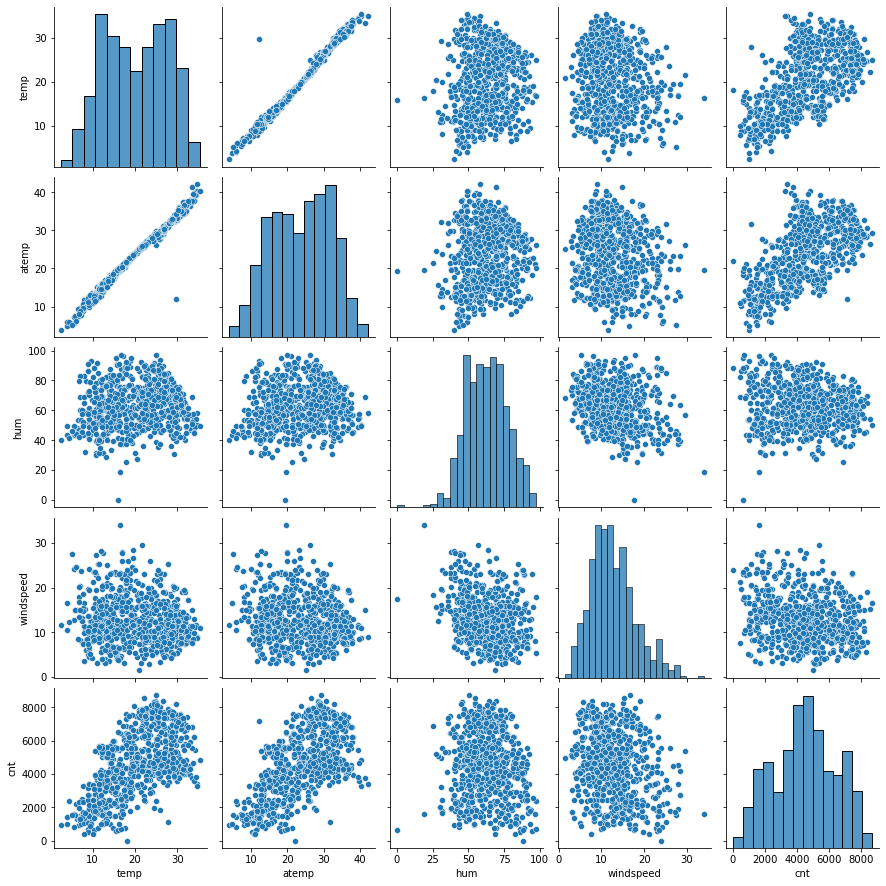

In [11]:
# visualize all the numeric columns against the target columns
#creating a new dataframe for all the numeric variables

plt.figure(figsize=(10,8))
bike_num= bike[['temp','atemp','hum','windspeed','cnt']]
    
#creating pairplot for the numeric variables    
sns.pairplot(bike_num)
plt.show()

### From the above pairplot it can be clearly observed that there is a direct relationship between 'temp', 'atemp' and 'cnt'

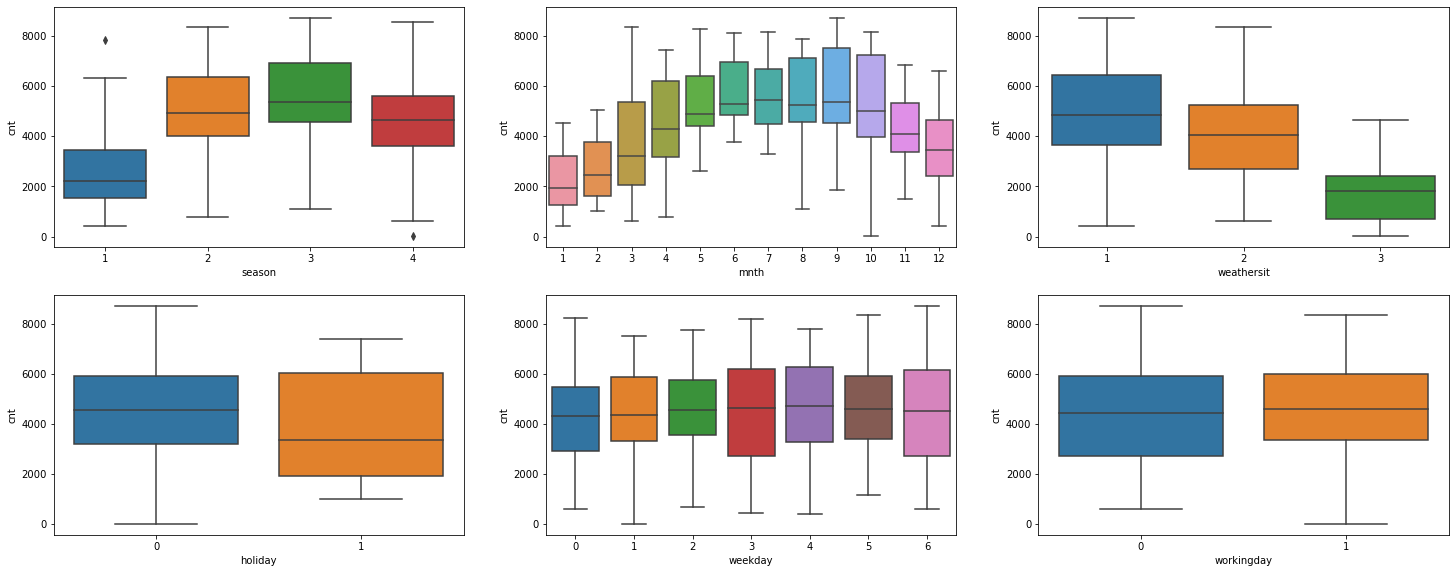

In [12]:
#visualizing the categorical variables
#creating boxplot for the categorical variables against the target variable 'cnt'

plt.figure(figsize=(25, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

# Below are the categorical variables in the dataset.Observations are as below-

### season- It seems that more than  (5000) bikes are being booked in Season 3 followed by season 2 and 3. Hence, season could be a predictor variable

### month - It seems that most of the bookings above (5K) are done during the months from 5th to 10th.Hence, month can also be considered a predictor variable

### weathersit- it is clearly observed that during weathersit 1 the highest bookings are done, followed by weathersit 2 and weathersit 3.Hence, weathersit can be another predictor variable

### holiday - Almost all the bookings are done when it is not a holiday and hence the graph is completely biased which means holiday is not a good predictor variable

### weekday- almost all bookings are equally done over all the weekdays,hence, it cannot be concluded correctly if weekday is a specific variable

### workingday- most of the bookings are done on a working day,hence, it seems working day can be a good predictor variable

### yr - the demand of bikes increased in the year 2019 when compared with year 2018.


# The above visualizations justifies that there is a co-relation between multiple variables and also few of the above variables can be used as predictor variables.Hence, we should go ahead and create our train and test data for buliding a LR Model

## Step 2 - Data Preparation for modelling

In [13]:
#remove redundant columns like instant which denotes just id and of no use
#remove registered and casual as total count comes under cnt
#remove dteday as year and month columns already exist

# creating a new dataframe bike_new with the required columns
bike_new=bike[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']]

In [14]:
#check top 5 data rows
bike_new.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [15]:
#check shape
bike_new.shape

(730, 12)

### The new dataset has 730 rows and 12 columns

In [16]:
#verifying value_counts for the entire dataframe

for column in bike_new.columns:
    print( bike_new[column].value_counts(),'\n')


3    188
2    184
1    180
4    178
Name: season, dtype: int64 

1    365
0    365
Name: yr, dtype: int64 

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

1    463
2    246
3     21
Name: weathersit, dtype: int64 

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64 

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
7

In [17]:
# from above data columns like season , holiday, weekday, weathersit
#arecategorical in nature so need to create dummy variables for these

# before this let's convert these columns as type category as these are int or float in nature
#which we got to know from info() function above


bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [18]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 75.2 KB


In [19]:
#creating the dummy variables for categorical variables
bike_new=pd.get_dummies(bike_new,drop_first=True)

In [20]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [21]:
bike_new.shape

(730, 30)

### all the above 30 columns are numeric now and ready for a test train data split

# Step 3 -  Splitting train and test data using sckitlearn

In [22]:
#importing relevant libraries
import sklearn
from sklearn.model_selection import train_test_split


In [23]:
# creating  train and test data using sklearn

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size=0.7, test_size=0.3,random_state=333)


In [24]:
#verify train data rows and columns
df_train.shape

(510, 30)

In [25]:
df_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
483         1         0         0       0       0       1       0       0   
650         0         0         1       0       0       0       0       0   
212         0         1         0       0       0       0       0       0   
714         0         0         1       0       0       0       0       0   
8           0         0         0       0       0       0       0       0   

     mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  weekday_1  weekday_2  \
483       0       0       0        0        0        0          0          0   
650       0       0       0        1        0        0          0          0   
212       0       1       0        0        0        0          1          0   
714       0       0       0        0        0        1          0          0   
8         0       0       0        0        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
483          0          0          0          0             0             0  
650          0          0          0          1             0             0  
212          0          0          0          0             0             0  
714          0          0          0          0             1             0  
8            0          0          0          0             0             0

In [26]:
#verify test data
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.682353   20.222164   23.594534   62.311249   
std      0.500487    0.151726    0.466018    7.498761    8.137295   14.410726   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.717924   16.744800   51.604150   
50%      1.000000    0.000000    1.000000   20.209597   23.973425   62.212850   
75%      1.000000    0.000000    1.000000   26.786653   30.327087   72.947900   
max      1.000000    1.000000    1.000000   35.328347   42.044800   96.250000   

        windspeed          cnt    season_2    season_3    season_4  \
count  510.000000   510.000000  510.000000  510.000000  510.000000   
mean    12.755513  4499.627451    0.247059    0.262745    0.241176   
std      5.208598  1949.447686    0.431725    0.440557    0.428217   
min      1.500244    22.000000    0.000000    0.000000    0.000000   
25%      9.000663  3146.500000    0.000000    0.000000    0.000000   
50%     12.083316  4510.000000    0.000000    0.000000    0.000000   
75%     15.614484  5983.500000    0.000000    1.000000    0.000000   
max     34.000021  8714.000000    1.000000    1.000000    1.000000   

           mnth_2      mnth_3      mnth_4      mnth_5      mnth_6      mnth_7  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.082353    0.078431    0.084314    0.092157    0.072549    0.078431   
std      0.275172    0.269113    0.278131    0.289531    0.259649    0.269113   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           mnth_8      mnth_9     mnth_10     mnth_11     mnth_12   weekday_1  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.098039    0.082353    0.084314    0.086275    0.076471    0.139216   
std      0.297660    0.275172    0.278131    0.281045    0.266010    0.346511   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_2   weekday_3   weekday_4   weekday_5   weekday_6  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.141176    0.150980    0.129412    0.145098    0.150980   
std      0.348545    0.358381    0.335985    0.352545    0.358381   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit_2  weathersit_3  
count    510.000000    510.000000  
mean       0.341176      0.025490  
std        0.474570      0.157763  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

In [27]:
#verify test data rows and columns
df_test.shape

(219, 30)

In [28]:
df_test.head()

yr  holiday  workingday       temp      atemp      hum  windspeed   cnt  \
22    0        0           0   3.957390   4.941955  43.6522  16.522200   986   
468   1        0           0  20.295000  24.399800  50.2917  12.791439  7460   
553   1        0           0  33.722500  39.519800  57.3750   8.417143  4672   
504   1        0           0  25.454153  29.198350  53.0417  17.042589  7129   
353   0        0           1  15.819153  19.822700  59.5417   4.125244  3750   

     season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
22          0         0         0       0       0       0       0       0   
468         1         0         0       0       0       1       0       0   
553         0         1         0       0       0       0       0       0   
504         1         0         0       0       0       0       1       0   
353         0         0         1       0       0       0       0       0   

     mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  weekday_1  weekday_2  \
22        0       0       0        0        0        0          0          0   
468       0       0       0        0        0        0          0          0   
553       1       0       0        0        0        0          0          0   
504       0       0       0        0        0        0          0          0   
353       0       0       0        0        0        1          0          1   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
22           0          0          0          0             0             0  
468          0          0          0          1             0             0  
553          0          0          0          0             0             0  
504          0          0          0          0             0             0  
353          0          0          0          0             1             0

In [29]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.493151    0.041096    0.684932   20.561863   24.047735   63.772104   
std      0.501098    0.198967    0.465607    7.550239    8.206161   13.817867   
min      0.000000    0.000000    0.000000    3.957390    4.941955   29.000000   
25%      0.000000    0.000000    0.000000   14.153918   17.210000   53.229200   
50%      0.000000    0.000000    1.000000   20.773347   24.873150   63.750000   
75%      1.000000    0.000000    1.000000   27.145403   30.966450   73.375000   
max      1.000000    1.000000    1.000000   34.815847   41.318550   97.250000   

        windspeed          cnt    season_2    season_3    season_4  \
count  219.000000   219.000000  219.000000  219.000000  219.000000   
mean    12.768098  4532.182648    0.264840    0.246575    0.251142   
std      5.185435  1911.832231    0.442259    0.432005    0.434663   
min      3.875669   506.000000    0.000000    0.000000    0.000000   
25%      9.062587  3192.000000    0.000000    0.000000    0.000000   
50%     12.166932  4592.000000    0.000000    0.000000    0.000000   
75%     15.660647  5905.500000    1.000000    0.000000    0.500000   
max     28.292425  8395.000000    1.000000    1.000000    1.000000   

           mnth_2      mnth_3      mnth_4      mnth_5      mnth_6      mnth_7  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.059361    0.100457    0.077626    0.068493    0.105023    0.100457   
std      0.236840    0.301297    0.268194    0.253169    0.307285    0.301297   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           mnth_8      mnth_9     mnth_10     mnth_11     mnth_12   weekday_1  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.054795    0.082192    0.086758    0.073059    0.105023    0.155251   
std      0.228100    0.275286    0.282125    0.260830    0.307285    0.362974   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_2   weekday_3   weekday_4   weekday_5   weekday_6  \
count  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.146119    0.118721    0.173516    0.132420    0.127854   
std      0.354034    0.324202    0.379560    0.339723    0.334692   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit_2  weathersit_3  
count    219.000000    219.000000  
mean       0.324201      0.036530  
std        0.469148      0.188034  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000

# Step 4 -  Rescaling feature

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
# instatntiate object scaler for MinMaxScaler
scaler= MinMaxScaler()

In [32]:
# check the numeric variables in the train data to scale
df_train.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
483   1        0           0  18.791653  22.50605  58.7083   7.832836  6304   
650   1        0           0  16.126653  19.56980  49.4583   9.791514  7109   
212   0        0           1  31.638347  35.16460  55.0833  10.500039  4266   
714   1        0           0  14.862500  18.49690  83.8750   6.749714  3786   
8     0        0           0   5.671653   5.80875  43.4167  24.250650   822   

     season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  mnth_6  \
483         1         0         0       0       0       1       0       0   
650         0         0         1       0       0       0       0       0   
212         0         1         0       0       0       0       0       0   
714         0         0         1       0       0       0       0       0   
8           0         0         0       0       0       0       0       0   

     mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  weekday_1  weekday_2  \
483       0       0       0        0        0        0          0          0   
650       0       0       0        1        0        0          0          0   
212       0       1       0        0        0        0          1          0   
714       0       0       0        0        0        1          0          0   
8         0       0       0        0        0        0          0          0   

     weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
483          0          0          0          0             0             0  
650          0          0          0          1             0             0  
212          0          0          0          0             0             0  
714          0          0          0          0             1             0  
8            0          0          0          0             0             0

In [33]:
#scaling the numeric variables
num_vars=['temp','atemp','hum','windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [34]:
# check the numeric variables in the train data after scaling
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
483   1        0           0  0.497426  0.487055  0.609956   0.194850   
650   1        0           0  0.416433  0.409971  0.513852   0.255118   
212   0        0           1  0.887856  0.819376  0.572294   0.276919   
714   1        0           0  0.378013  0.381804  0.871429   0.161523   
8     0        0           0  0.098690  0.048706  0.451083   0.700017   

          cnt  season_2  season_3  season_4  mnth_2  mnth_3  mnth_4  mnth_5  \
483  0.722734         1         0         0       0       0       1       0   
650  0.815347         0         0         1       0       0       0       0   
212  0.488265         0         1         0       0       0       0       0   
714  0.433042         0         0         1       0       0       0       0   
8    0.092039         0         0         0       0       0       0       0   

     mnth_6  mnth_7  mnth_8  mnth_9  mnth_10  mnth_11  mnth_12  weekday_1  \
483       0       0       0       0        0        0        0          0   
650       0       0       0       0        1        0        0          0   
212       0       0       1       0        0        0        0          1   
714       0       0       0       0        0        0        1          0   
8         0       0       0       0        0        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
483          0          0          0          0          0             0   
650          0          0          0          0          1             0   
212          0          0          0          0          0             0   
714          0          0          0          0          0             1   
8            0          0          0          0          0             0   

     weathersit_3  
483             0  
650             0  
212             0  
714             0  
8               0

In [35]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.501961    0.023529    0.682353    0.540901    0.515631    0.647390   
std      0.500487    0.151726    0.466018    0.227898    0.213626    0.149722   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.343228    0.335807    0.536147   
50%      1.000000    0.000000    1.000000    0.540519    0.525578    0.646367   
75%      1.000000    0.000000    1.000000    0.740406    0.692378    0.757900   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt    season_2    season_3    season_4      mnth_2  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.346318    0.515144    0.247059    0.262745    0.241176    0.082353   
std      0.160266    0.224281    0.431725    0.440557    0.428217    0.275172   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.230784    0.359468    0.000000    0.000000    0.000000    0.000000   
50%      0.325635    0.516337    0.000000    0.000000    0.000000    0.000000   
75%      0.434287    0.685861    0.000000    1.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           mnth_3      mnth_4      mnth_5      mnth_6      mnth_7      mnth_8  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.078431    0.084314    0.092157    0.072549    0.078431    0.098039   
std      0.269113    0.278131    0.289531    0.259649    0.269113    0.297660   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           mnth_9     mnth_10     mnth_11     mnth_12   weekday_1   weekday_2  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.082353    0.084314    0.086275    0.076471    0.139216    0.141176   
std      0.275172    0.278131    0.281045    0.266010    0.346511    0.348545   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_3   weekday_4   weekday_5   weekday_6  weathersit_2  \
count  510.000000  510.000000  510.000000  510.000000    510.000000   
mean     0.150980    0.129412    0.145098    0.150980      0.341176   
std      0.358381    0.335985    0.352545    0.358381      0.474570   
min      0.000000    0.000000    0.000000    0.000000      0.000000   
25%      0.000000    0.000000    0.000000    0.000000      0.000000   
50%      0.000000    0.000000    0.000000    0.000000      0.000000   
75%      0.000000    0.000000    0.000000    0.000000      1.000000   
max      1.000000    1.000000    1.000000    1.000000      1.000000   

       weathersit_3  
count    510.000000  
mean       0.025490  
std        0.157763  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

### The minimum and maximum values are 0 and 1 respectively,hence,the numeric values are scaled correctly

### checking corelation coefficient

In [36]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(),annot=True,cmap='Greens')
plt.show()

### Insights -
temp and atemp has high corelation of 0.99

yr,temp and atemp have high corelation with cnt


## Dividing into X and Y sets for the model building

In [37]:
# divding the train data into X_train and y_train

y_train=df_train.pop('cnt')
X_train=df_train


## Step 5 - Building our model
### We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [41]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [42]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [43]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
2           temp  384.22
3          atemp  363.12
4            hum   17.52
7       season_3    7.09
5      windspeed    4.71
1     workingday    4.61
6       season_2    3.54
8       season_4    3.01
13  weathersit_2    2.14
0             yr    2.02
12     weekday_6    1.80
11       mnth_10    1.66
10        mnth_9    1.28
9         mnth_3    1.20
14  weathersit_3    1.17

In [44]:
import statsmodels.api as sm
X_train_lm1=sm.add_constant(X_train_rfe)

lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [45]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.28e-186
Time:                        18:09:18   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576      0.000       0.137       0.254
yr               0.2287      0.008     28.013      0.000       0.213       0.245
workingday       0.0408      0.011      3.705      0.000       0.019       0.062
temp             0.4339      0.134      3.238      0.001       0.171       0.697
atemp            0.0586      0.137      0.427      0.670      -0.211       0.328
hum             -0.1784      0.037     -4.777      0.000      -0.252      -0.105
windspeed       -0.1849      0.028     -6.612      0.000      -0.240      -0.130
season_2         0.1302      0.015      8.575      0.000       0.100       0.160
season_3         0.0796      0.021      3.818      0.000       0.039       0.121
season_4         0.1535      0.014     10.765      0.000       0.125       0.181
mnth_3           0.0471      0.016      2.958      0.003       0.016       0.078
mnth_9           0.1000      0.016      6.303      0.000       0.069       0.131
mnth_10          0.0544      0.018      3.046      0.002       0.019       0.089
weekday_6        0.0546      0.014      3.818      0.000       0.027       0.083
weathersit_2    -0.0475      0.011     -4.455      0.000      -0.068      -0.027
weathersit_3    -0.2712      0.028     -9.542      0.000      -0.327      -0.215
==============================================================================
Omnibus:                       92.576   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.202
Skew:                          -0.933   Prob(JB):                     9.26e-49
Kurtosis:                       5.632   Cond. No.                         85.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Removing the atemp column based on high P value and high VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [47]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  23.21
3            hum  17.23
6       season_3   7.01
1     workingday   4.60
4      windspeed   4.55
5       season_2   3.54
7       season_4   3.01
12  weathersit_2   2.14
0             yr   2.02
11     weekday_6   1.79
10       mnth_10   1.66
9         mnth_9   1.28
8         mnth_3   1.20
13  weathersit_3   1.17

In [48]:
import statsmodels.api as sm
X_train_lm2=sm.add_constant(X_train_new)

lr2 = sm.OLS(y_train, X_train_lm2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.00e-187
Time:                        18:09:18   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627      0.000       0.138       0.254
yr               0.2287      0.008     28.034      0.000       0.213       0.245
workingday       0.0408      0.011      3.706      0.000       0.019       0.062
temp             0.4893      0.034     14.595      0.000       0.423       0.555
hum             -0.1778      0.037     -4.769      0.000      -0.251      -0.105
windspeed       -0.1872      0.027     -6.823      0.000      -0.241      -0.133
season_2         0.1304      0.015      8.592      0.000       0.101       0.160
season_3         0.0787      0.021      3.797      0.000       0.038       0.119
season_4         0.1537      0.014     10.802      0.000       0.126       0.182
mnth_3           0.0473      0.016      2.971      0.003       0.016       0.079
mnth_9           0.1000      0.016      6.309      0.000       0.069       0.131
mnth_10          0.0544      0.018      3.052      0.002       0.019       0.089
weekday_6        0.0547      0.014      3.828      0.000       0.027       0.083
weathersit_2    -0.0476      0.011     -4.475      0.000      -0.069      -0.027
weathersit_3    -0.2715      0.028     -9.567      0.000      -0.327      -0.216
==============================================================================
Omnibus:                       92.002   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.387
Skew:                          -0.929   Prob(JB):                     2.29e-48
Kurtosis:                       5.622   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
# On verifying the p-values and VIF, it seems that humidity has a very high VIF normal P-value though but it should be removed
X_train_new = X_train_new.drop(["hum"], axis = 1)


In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  16.81
5       season_3   6.75
3      windspeed   4.27
1     workingday   4.11
4       season_2   3.51
6       season_4   2.89
0             yr   2.02
9        mnth_10   1.66
10     weekday_6   1.66
11  weathersit_2   1.54
8         mnth_9   1.27
7         mnth_3   1.20
12  weathersit_3   1.08

In [51]:
X_train_lm3=sm.add_constant(X_train_new)


In [52]:
lm3=sm.OLS(y_train,X_train_lm3).fit()

In [53]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          4.52e-184
Time:                        18:09:18   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509      0.000       0.052       0.132
yr               0.2331      0.008     28.149      0.000       0.217       0.249
workingday       0.0424      0.011      3.778      0.000       0.020       0.065
temp             0.4567      0.034     13.620      0.000       0.391       0.523
windspeed       -0.1488      0.027     -5.553      0.000      -0.201      -0.096
season_2         0.1319      0.015      8.512      0.000       0.101       0.162
season_3         0.0879      0.021      4.172      0.000       0.047       0.129
season_4         0.1502      0.015     10.346      0.000       0.122       0.179
mnth_3           0.0553      0.016      3.419      0.001       0.024       0.087
mnth_9           0.0914      0.016      5.678      0.000       0.060       0.123
mnth_10          0.0533      0.018      2.926      0.004       0.018       0.089
weekday_6        0.0555      0.015      3.798      0.000       0.027       0.084
weathersit_2    -0.0771      0.009     -8.727      0.000      -0.095      -0.060
weathersit_3    -0.3242      0.027    -12.139      0.000      -0.377      -0.272
==============================================================================
Omnibus:                       87.519   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.489
Skew:                          -0.891   Prob(JB):                     2.39e-45
Kurtosis:                       5.548   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The adjusted R- squared seems to be almost the same so it was good to remove 'hum'.Lets check the VIF again for remanining columns

In [54]:
# On verifying the p-values and VIF, it seems that season_3 has a  high VIF normal P-value though so it should be removed
X_train_new = X_train_new.drop(["season_3"], axis = 1)


In [55]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  4.92
3      windspeed  4.15
1     workingday  4.07
0             yr  2.01
5       season_4  1.98
9      weekday_6  1.66
8        mnth_10  1.63
4       season_2  1.56
10  weathersit_2  1.54
7         mnth_9  1.23
6         mnth_3  1.15
11  weathersit_3  1.08

In [56]:
# Check for the VIF values for the remaining feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  4.92
3      windspeed  4.15
1     workingday  4.07
0             yr  2.01
5       season_4  1.98
9      weekday_6  1.66
8        mnth_10  1.63
4       season_2  1.56
10  weathersit_2  1.54
7         mnth_9  1.23
6         mnth_3  1.15
11  weathersit_3  1.08

In [57]:
X_train_lm4=sm.add_constant(X_train_new)
lm4=sm.OLS(y_train,X_train_lm4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.56e-181
Time:                        18:09:18   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775      0.000       0.037       0.117
yr               0.2313      0.008     27.520      0.000       0.215       0.248
workingday       0.0422      0.011      3.699      0.000       0.020       0.065
temp             0.5683      0.021     27.663      0.000       0.528       0.609
windspeed       -0.1533      0.027     -5.633      0.000      -0.207      -0.100
season_2         0.0837      0.010      7.976      0.000       0.063       0.104
season_4         0.1197      0.013      9.390      0.000       0.095       0.145
mnth_3           0.0441      0.016      2.722      0.007       0.012       0.076
mnth_9           0.1028      0.016      6.382      0.000       0.071       0.134
mnth_10          0.0419      0.018      2.290      0.022       0.006       0.078
weekday_6        0.0569      0.015      3.838      0.000       0.028       0.086
weathersit_2    -0.0773      0.009     -8.607      0.000      -0.095      -0.060
weathersit_3    -0.3166      0.027    -11.691      0.000      -0.370      -0.263
==============================================================================
Omnibus:                       70.599   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.361
Skew:                          -0.787   Prob(JB):                     3.32e-31
Kurtosis:                       5.031   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#drop mnth_10 as it has a high p value >0.005
X_train_new = X_train_new.drop(['mnth_10'], axis = 1)


In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  4.80
3      windspeed  4.11
1     workingday  4.07
0             yr  2.00
8      weekday_6  1.66
4       season_2  1.56
9   weathersit_2  1.53
5       season_4  1.41
7         mnth_9  1.20
6         mnth_3  1.15
10  weathersit_3  1.07

In [60]:
X_train_lm5=sm.add_constant(X_train_new)
lm5=sm.OLS(y_train,X_train_lm5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          1.39e-181
Time:                        18:09:18   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640      0.000       0.034       0.114
yr               0.2302      0.008     27.316      0.000       0.214       0.247
workingday       0.0423      0.011      3.689      0.000       0.020       0.065
temp             0.5756      0.020     28.239      0.000       0.536       0.616
windspeed       -0.1562      0.027     -5.720      0.000      -0.210      -0.103
season_2         0.0826      0.011      7.842      0.000       0.062       0.103
season_4         0.1348      0.011     12.297      0.000       0.113       0.156
mnth_3           0.0448      0.016      2.754      0.006       0.013       0.077
mnth_9           0.0964      0.016      6.051      0.000       0.065       0.128
weekday_6        0.0574      0.015      3.855      0.000       0.028       0.087
weathersit_2    -0.0757      0.009     -8.417      0.000      -0.093      -0.058
weathersit_3    -0.3112      0.027    -11.486      0.000      -0.364      -0.258
==============================================================================
Omnibus:                       62.037   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.440
Skew:                          -0.729   Prob(JB):                     1.41e-25
Kurtosis:                       4.806   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#drop mnth_3 as it has a high p-value
X_train_new = X_train_new.drop(['mnth_3'], axis = 1)


In [62]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07

In [63]:
X_train_lm6=sm.add_constant(X_train_new)
lm6=sm.OLS(y_train,X_train_lm6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          3.77e-181
Time:                        18:09:18   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168      0.000       0.044       0.124
yr               0.2308      0.008     27.226      0.000       0.214       0.248
workingday       0.0432      0.012      3.745      0.000       0.021       0.066
temp             0.5636      0.020     28.119      0.000       0.524       0.603
windspeed       -0.1552      0.027     -5.648      0.000      -0.209      -0.101
season_2         0.0827      0.011      7.805      0.000       0.062       0.104
season_4         0.1287      0.011     11.910      0.000       0.108       0.150
mnth_9           0.0947      0.016      5.910      0.000       0.063       0.126
weekday_6        0.0569      0.015      3.796      0.000       0.027       0.086
weathersit_2    -0.0748      0.009     -8.268      0.000      -0.093      -0.057
weathersit_3    -0.3070      0.027    -11.274      0.000      -0.360      -0.253
==============================================================================
Omnibus:                       62.965   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.899
Skew:                          -0.715   Prob(JB):                     1.25e-27
Kurtosis:                       4.946   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lm6.params

const           0.084143
yr              0.230846
workingday      0.043203
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

## Insights - 

From the above lr model summary, it is evident that all our coefficients are not equal to zero which means We REJECT the NULL HYPOTHESIS
We will consider above model lm6 as our final model

### The equation of best fitted surface based on model :

cnt = 0.082768 + (yr × 0.230846) + (workingday × 0.043203) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season4 ×0.128744) + (mnth9 × 0.094743) + (weekday6 ×0.056909) − (weathersit2 × 0.074807) − (weathersit3 × 0.306992)

Interpretation of Coefficients:
temp: A coefficient value of ‘0.563615’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.563615 units.

weathersit_3: A coefficient value of ‘-0.306992’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.306992 units.

yr: A coefficient value of ‘0.230846’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.230846 units.

season_4: A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

windspeed: A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

workingday: A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

season_2: A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

mnth_9: A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

weekday_6: A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

weathersit_2: A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

const: The Constant value of ‘0.082768’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.082768 units.

# Step 6 - Model Validation

### absence of multicollinearity

In [65]:
# calculate VIF for final model
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  4.72
3     windspeed  4.02
1    workingday  4.01
0            yr  2.00
7     weekday_6  1.65
4      season_2  1.56
8  weathersit_2  1.52
5      season_4  1.38
6        mnth_9  1.20
9  weathersit_3  1.07

### Insight - the vif values are less than 5 for the final model So we can consider that there is insignificant multicolinearity among the predictor variables.

### linear relationship

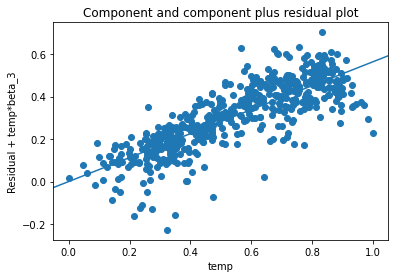

In [66]:
sm.graphics.plot_ccpr(lm6, 'temp')
plt.show()

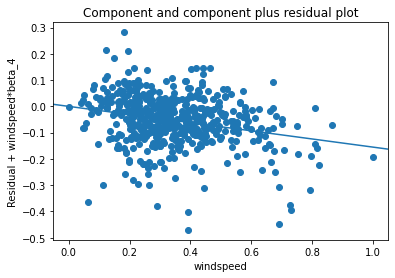

In [67]:
sm.graphics.plot_ccpr(lm6, 'windspeed')
plt.show()

### the above graphs show linear relationship between the final model and the predictor variables

### normality of errors

In [68]:
# Plot the histogram of the error terms
y_train_pred=lm6.predict(X_train_lm6)
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot((res), bins = 20)
sm.qqplot((res), fit=True, line='45')
plt.show()


### From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Homoscedasticity

In [69]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), 'r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### There is no visible pattern in residual values, thus homoscedacity is well preserved

# Step 7- Make predictions on test data

In [70]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.shape

(219, 30)

In [72]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.493151    0.041096    0.684932    0.551225    0.527528    0.662567   
std      0.501098    0.198967    0.465607    0.229463    0.215434    0.143562   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.301299   
25%      0.000000    0.000000    0.000000    0.356479    0.348019    0.553031   
50%      0.000000    0.000000    1.000000    0.557653    0.549198    0.662338   
75%      1.000000    0.000000    1.000000    0.751309    0.709163    0.762338   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.010390   

        windspeed         cnt    season_2    season_3    season_4      mnth_2  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.346706    0.518889    0.264840    0.246575    0.251142    0.059361   
std      0.159553    0.219953    0.442259    0.432005    0.434663    0.236840   
min      0.073090    0.055683    0.000000    0.000000    0.000000    0.000000   
25%      0.232689    0.364703    0.000000    0.000000    0.000000    0.000000   
50%      0.328208    0.525771    0.000000    0.000000    0.000000    0.000000   
75%      0.435708    0.676887    1.000000    0.000000    0.500000    0.000000   
max      0.824380    0.963300    1.000000    1.000000    1.000000    1.000000   

           mnth_3      mnth_4      mnth_5      mnth_6      mnth_7      mnth_8  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.100457    0.077626    0.068493    0.105023    0.100457    0.054795   
std      0.301297    0.268194    0.253169    0.307285    0.301297    0.228100   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

           mnth_9     mnth_10     mnth_11     mnth_12   weekday_1   weekday_2  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.082192    0.086758    0.073059    0.105023    0.155251    0.146119   
std      0.275286    0.282125    0.260830    0.307285    0.362974    0.354034   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_3   weekday_4   weekday_5   weekday_6  weathersit_2  \
count  219.000000  219.000000  219.000000  219.000000    219.000000   
mean     0.118721    0.173516    0.132420    0.127854      0.324201   
std      0.324202    0.379560    0.339723    0.334692      0.469148   
min      0.000000    0.000000    0.000000    0.000000      0.000000   
25%      0.000000    0.000000    0.000000    0.000000      0.000000   
50%      0.000000    0.000000    0.000000    0.000000      0.000000   
75%      0.000000    0.000000    0.000000    0.000000      1.000000   
max      1.000000    1.000000    1.000000    1.000000      1.000000   

       weathersit_3  
count    219.000000  
mean       0.036530  
std        0.188034  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000

In [73]:
# Dividing data into X_test and y_test

y_test=df_test.pop('cnt')
X_test=df_test


In [74]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test)

X_test_new

const  yr  workingday      temp  windspeed  season_2  season_4  mnth_9  \
22     1.0   0           0  0.046591   0.462217         0         0       0   
468    1.0   1           0  0.543115   0.347424         1         0       0   
553    1.0   1           0  0.951196   0.212829         0         0       0   
504    1.0   1           0  0.699909   0.478229         1         0       0   
353    1.0   0           1  0.407087   0.080770         0         1       0   
..     ...  ..         ...       ...        ...       ...       ...     ...   
237    1.0   0           1  0.798555   0.126931         0         0       0   
611    1.0   1           1  0.830744   0.441027         0         0       1   
258    1.0   0           1  0.510926   0.292310         0         0       1   
518    1.0   1           0  0.677065   0.333343         1         0       0   
313    1.0   0           1  0.399819   0.343610         0         1       0   

     weekday_6  weathersit_2  weathersit_3  
22           0             0             0  
468          1             0             0  
553          0             0             0  
504          0             0             0  
353          0             1             0  
..         ...           ...           ...  
237          0             0             0  
611          0             0             0  
258          0             1             0  
518          0             0             0  
313          0             1             0  

[219 rows x 11 columns]

In [75]:
y_pred = lm6.predict(X_test_new)

# Step 8 - Model Evaluation

### R^2 value for test data

In [76]:
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred)
r2

0.8203092200749708

In [77]:
# Get the shape of X_test
X_test.shape


(219, 10)

In [78]:
n=X_test.shape[0]

p=X_test.shape[1]

In [79]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708829

Model Train & Test R2 Statsitics Comparison

Train Dataset
R2 Value - 82.4%
Adjusted R2 Value -82.1%

Test Dataset
R2 Value- 82%
Adjusted R2 Value- 81.1%

# Model Summary

### As per the final model, the top predictor variables that influences bike booking are:
Temperature (Temp)
A coefficient value of ‘0.563615’ indicated that a temperature has significant impact on bike rentals

weathersit_3
A coefficient value of ‘-0.306992’ indicated that the light snow and rain deters people from renting out bikes

Year (yr)
A coefficient value of ‘0.230846’ indicated that a year wise the rental numbers are increasing